In [1]:
import sys
sys.path.append(r'..') 
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

from model.model import MeNet
from model.Gdata import Data
from model.config import Config
from tqdm import tqdm
import matplotlib.pyplot as plt 
import numpy as np
import json

In [2]:
def load_json_file(fpath):
    with open(fpath, 'r') as f:
        data = json.load(f)
    return data

In [3]:

file_path = '../DataSet/Demo3/'
data = load_json_file(str(file_path+'/config.json'))

print('Modulation:',data['modulate_aber'])
print('Initial Mode Ranges:',data['zernike_amplitude_ranges'])

Modulation: {'5': 0.2, '6': 0.2, '11': 0.2}
Initial Mode Ranges: {'5': 0.5, '6': 0.5, '7': 0.5, '8': 0.5, '9': 0.5, '10': 0.5, '11': 0.5}


In [4]:
net_architecture = 'MeNet' 
c = Config(zernike_amplitude_ranges=data['zernike_amplitude_ranges'],
           modulate_aber=data['modulate_aber'],net_architecture = net_architecture,
           isMultiStream = 3,isRealTime = False,psf_na_detection=data['psf_na_detection'], 
           psf_units=tuple(data['psf_units']), psf_n=data['psf_n'], 
           psf_lam_detection=data['psf_lam_detection'],dataFile = data['dataFile'], 
           isRegular = data['isRegular'], regularValue = data['regularValue'])
#vars(c)

In [5]:
model = MeNet(config=c, name='seven_simulation', basedir='Demo3//')

input_shape [(32, 32, 2), (32, 32, 2), (32, 32, 2)]
output_size: 7


In [6]:
print("Net_architecture:",model.config.net_architecture)
print("Batch_size:",model.config.train_batch_size)
print("train_steps_per_epoch:",model.config.train_steps_per_epoch)
print("The number of predicted aberrations:",model.config.n_channel_out)
print("Range of predicted aberrations: ",model.config.zernike_amplitude_ranges)
print("Induced bias :",model.config.modulate_aber)
print("Net_architecture:",model.config.net_architecture)
print("Net_Learning_rate:",model.config.train_learning_rate)
print("RealTime:",model.config.isRealTime)
print("DataFile:",model.config.dataFile)

Net_architecture: MeNet
Batch_size: 32
train_steps_per_epoch: 1000
The number of predicted aberrations: 7
Range of predicted aberrations:  {'5': 0.5, '6': 0.5, '7': 0.5, '8': 0.5, '9': 0.5, '10': 0.5, '11': 0.5}
Induced bias : {'5': 0.2, '6': 0.2, '11': 0.2}
Net_architecture: MeNet
Net_Learning_rate: 0.0006
RealTime: False
DataFile: ../DataSet/Demo3//


In [7]:
model.config.train_learning_rate = 6e-3
model.config.train_steps_per_epoch = 1000
model.config.train_batch_size = 32
model.config.train_n_val = 64


In [8]:
model.train(epochs=100)

c:\Users\ASUS\anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
e:\Project\MeNet-AO\Demo\..\utils\psf.py:58: RuntimeWarning: invalid value encountered in sqrt
  H = np.sqrt(1. * self.n ** 2 - KR3 ** 2 * lam_detection ** 2)


trainCheckpoint weights_best.h5
------------------------------
load train data...
------------------------------
e:\Project\MeNet-AO\Demo
(4500, 7)
load finished


c:\Users\ASUS\anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
1000/1000 [==============================] - 59s 51ms/step - loss: 0.0284 - val_loss: 0.0238
Epoch 2/100
1000/1000 [==============================] - 49s 49ms/step - loss: 0.0056 - val_loss: 0.6053
Epoch 3/100
1000/1000 [==============================] - 50s 50ms/step - loss: 0.0031 - val_loss: 0.0850
Epoch 4/100
1000/1000 [==============================] - 49s 49ms/step - loss: 0.0020 - val_loss: 0.0247
Epoch 5/100
1000/1000 [==============================] - 49s 49ms/step - loss: 0.0015 - val_loss: 0.0171
Epoch 6/100
1000/1000 [==============================] - 49s 49ms/step - loss: 9.8852e-04 - val_loss: 0.0413
Epoch 7/100
1000/1000 [==============================] - 49s 49ms/step - loss: 0.0036 - val_loss: 0.0028
Epoch 8/100
1000/1000 [==============================] - 49s 49ms/step - loss: 8.4935e-04 - val_loss: 0.0018
Epoch 9/100
1000/1000 [==============================] - 49s 49ms/step - loss: 5.7114e-04 - val_loss: 0.0011
Epoch 10/100
1000/1000 [===================

In [9]:
data_kwargs = dict (
            amplitude_ranges     = model.config.zernike_amplitude_ranges,
            order                = model.config.zernike_order,
            normed               = model.config.zernike_normed,
            psf_shape            = model.config.psf_shape,
            units                = model.config.psf_units,
            na_detection         = model.config.psf_na_detection,
            lam_detection        = model.config.psf_lam_detection,
            n                    = model.config.psf_n,
            NoiseIs              = model.config.NoiseIs,
            modulate_aber        = model.config.modulate_aber,
            isMultiStream        = model.config.isMultiStream,
            isRealTime           = True,
            dataFile             = model.config.dataFile,
            isRegular            = model.config.isRegular,
            regularValue         = model.config.regularValue
        )

## load test dataset

In [3]:
test_data = np.load(model.config.dataFile+'data_test.npz')
X1_test = test_data['X1_test']
X2_test = test_data['X2_test']
X3_test = test_data['X3_test']
Y_test = test_data['Y_test']

In [4]:
X = {'X1': X1_test, 'X2': X2_test, 'X3': X3_test}
gt = Y_test

## Predict

In [5]:
zerns_noll = []
for k in model.config.zernike_amplitude_ranges.keys():
    zerns_noll.append(int(k))
pre = model.keras_model.predict(X)

## Results Evaluation

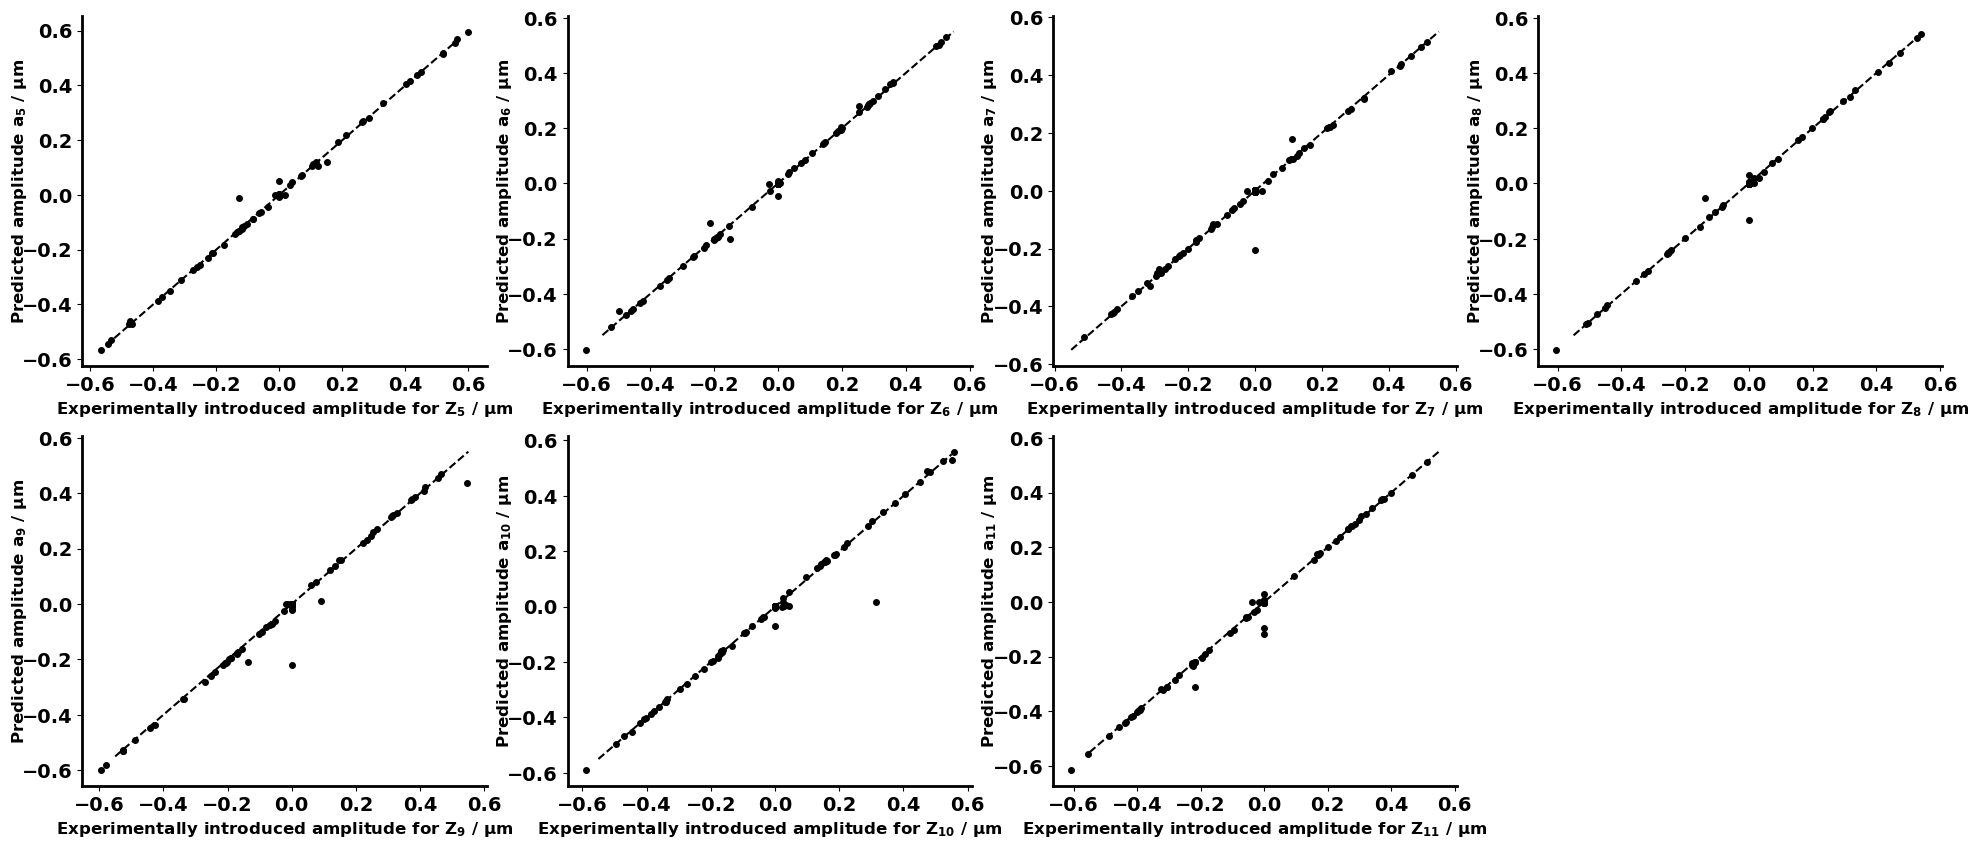

In [6]:
plt.figure(figsize=(24, 10),facecolor='w',edgecolor='w')
mode_num = 0
# rangeLimit = model.config.zernike_amplitude_ranges['5']
# lower_limit,upper_limit = rangeLimit[0]-0.05,rangeLimit[1]+0.05
lower_limit,upper_limit = -0.5-0.05,0.5+0.05
for j in range(gt.shape[1]):
    plt.subplot(2,4,j+1)
    #ax = plt.subplot(2,2,j+1).add_axes((0.14, .12, .8, .77))
    ax = plt.gca()
    for i in range(gt.shape[0]):
        # ax.plot(gt[i][mode_num],tmp[i][mode_num],"o",color=colors[i], markersize=4)
        ax.plot(gt[i][mode_num],pre[i][mode_num],"o",color='black', markersize=4)
    
    # plt.ylim(lower_limit,upper_limit)
    # plt.xlim(lower_limit,upper_limit)
    # plt.grid(False)

    plt.xlabel(f'Experimentally introduced amplitude for $\mathbf{{Z_{{{zerns_noll[mode_num]}}}}}$ / $\mathbf{{\mu m}}$' , 
               size=12, fontweight='bold', labelpad=4)
    plt.ylabel(f'Predicted amplitude $\mathbf{{a_{{{zerns_noll[mode_num]}}}}}$ / $\mathbf{{\mu m}}$', 
               size=12, fontweight='bold', labelpad=-5)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_linewidth(2)  # x轴加粗
    ax.spines['left'].set_linewidth(2)    # y轴加粗

    plt.yticks(size=14,color="black", fontweight='bold')
    plt.xticks(size=14,color="black", fontweight='bold')
    # plt.ylim(lower_limit,upper_limit)
    # plt.xlim(lower_limit,upper_limit)

    # sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    # sm.set_array([])  # 为空数组
    # plt.colorbar(sm, ax=ax, label='Color Scale')

    XX = np.linspace(lower_limit, upper_limit, num=50)
    YY = 1 * XX
    ax.plot(XX, YY, ls="--", color = "k")

    mode_num = mode_num+1
    


In [7]:
from utils.zernike import ZernikeWavefront


def compute_WFrmse(z_gt,z_pre):
    rmse = []
    zerns_noll = [5,6,7,8,9,10,11]
    for i in range(len(z_gt)):       
        pre_tmp = dict(zip(zerns_noll,z_pre[i]))
        p_wavefront = ZernikeWavefront(pre_tmp, order='noll') 
        #gt = random_mode_gt[i]
        gt_tmp = dict(zip(zerns_noll,z_gt[i]))
        #print(tmp)
        gt_wavefront = ZernikeWavefront(gt_tmp, order='noll') 
        
        rmse.append(np.sqrt(np.nanmean((gt_wavefront.polynomial(32)-p_wavefront.polynomial(32))**2)))
    return rmse

In [8]:
Initial_rmse = compute_WFrmse(gt,np.zeros((gt.shape[0],gt.shape[1])))
residual_rmse = compute_WFrmse(gt,pre)

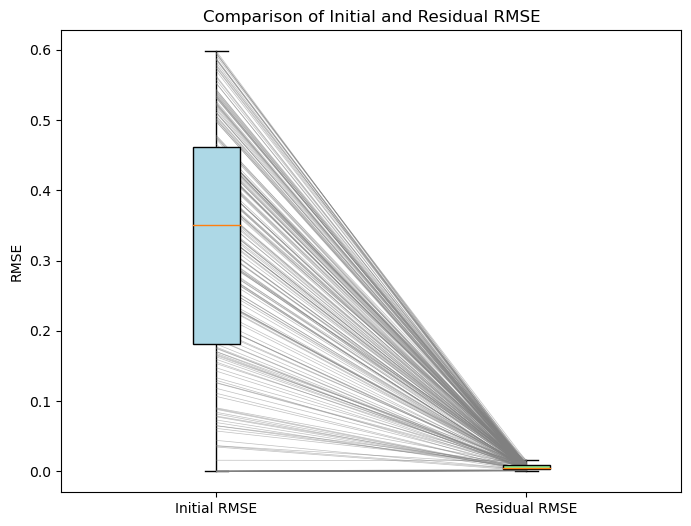

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def get_outlier_indices(data):
    data = np.asarray(data)
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return set(np.where((data < lower) | (data > upper))[0])

outliers_init = get_outlier_indices(Initial_rmse)
outliers_res  = get_outlier_indices(residual_rmse)
outlier_indices = outliers_init.union(outliers_res)

fig, ax = plt.subplots(figsize=(8, 6))
box = ax.boxplot(
    [Initial_rmse, residual_rmse],
    patch_artist=True,
    labels=['Initial RMSE', 'Residual RMSE'],
    showfliers=False
)
for patch, color in zip(box['boxes'], ['lightblue', 'lightgreen']):
    patch.set_facecolor(color)

# 3. 对非离群点画连线
for i, (x, y) in enumerate(zip(Initial_rmse, residual_rmse)):
    if i not in outlier_indices:
        ax.plot([1, 2], [x, y], color='gray', alpha=0.5, linewidth=0.5)

ax.set_ylabel('RMSE')
ax.set_title('Comparison of Initial and Residual RMSE')
plt.show()
